<a href="https://colab.research.google.com/github/yucellgereklioglu/datasciencework/blob/main/outlier_leverage_bulma_tekli_lineer_regresyon_modeli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score,root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/content/Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [6]:
df.fillna(0,inplace=True)

In [7]:
df=df.drop('Unnamed: 0',axis=1)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y= df['Salary']
x= df.drop('Salary',axis=1)
y = scaler.fit_transform(y.values.reshape(-1, 1)).ravel() # Reshape and ravel to fit StandardScaler input
x = scaler.fit_transform(x)

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)


In [29]:
y_train

array([-0.71830716, -0.55250402,  1.40274136, -0.70662043,  0.93861127,
        0.82623317, -0.70201994,  0.66547573,  0.19885989, -0.42881019,
       -0.58815781, -0.37004264,  1.24020308,  0.58377993,  1.09740238,
       -1.36011263, -1.419919  , -0.47433279,  1.51986835,  1.3590738 ,
        1.72102849, -1.10552744, -0.74976858, -1.20495739])

In [26]:
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [27]:
y_pred=lr.predict(x_test)
rmse=root_mean_squared_error(y_test,y_pred)
rmse

0.18912797645681031

In [82]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(x_train_scaled, y_train)
y_pred = ridge_reg.predict(x_train_scaled)
rmse=root_mean_squared_error(y_train,y_pred)
rmse

0.0923331281849412

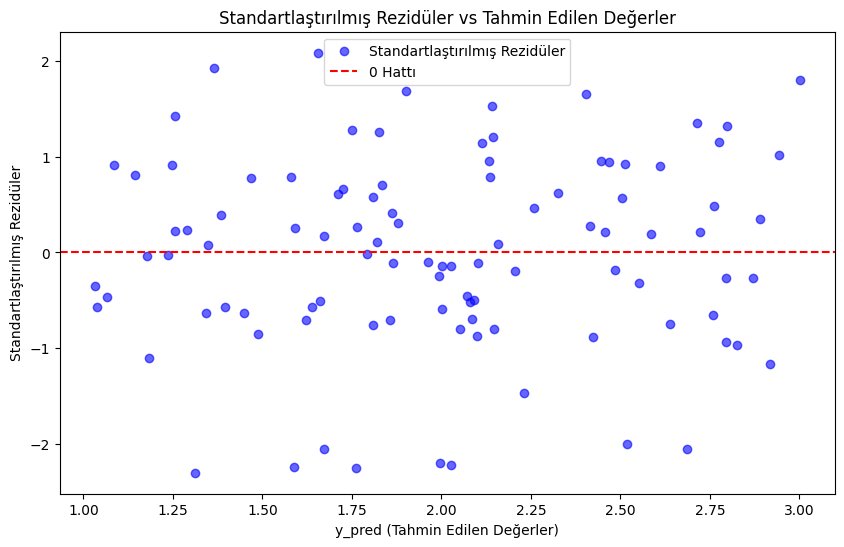

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
residuals = y_train - y_pred
residuals_scaled = residuals.ravel() / np.std(residuals.ravel())
plt.figure(figsize=(10, 6))
plt.scatter(y_pred.ravel(), residuals_scaled, color='blue', alpha=0.6, label='Standartlaştırılmış Rezidüler')
plt.axhline(0, color='red', linestyle='--', label='0 Hattı')
plt.xlabel('y_pred (Tahmin Edilen Değerler)')
plt.ylabel('Standartlaştırılmış Rezidüler')
plt.title('Standartlaştırılmış Rezidüler vs Tahmin Edilen Değerler')
plt.legend()
plt.show()


Sapan değerlerin bulunduğu gözlem indeksleri: [16 24 26 42 51 53 55 69 77]


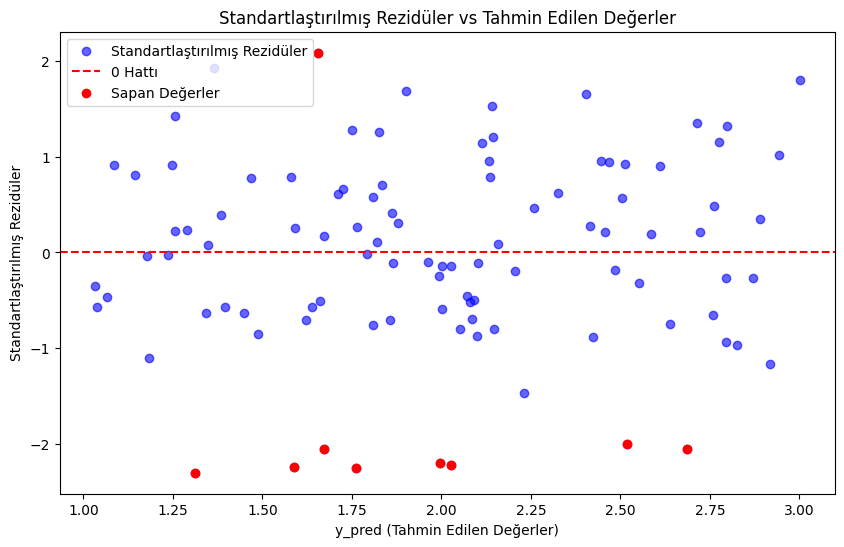

In [81]:
outlier_threshold = 2
outliers = np.where(np.abs(residuals_scaled) > outlier_threshold)[0]
print(f"Sapan değerlerin bulunduğu gözlem indeksleri: {outliers}")
plt.figure(figsize=(10, 6))
plt.scatter(y_pred.ravel(), residuals_scaled, color='blue', alpha=0.6, label='Standartlaştırılmış Rezidüler')
plt.axhline(0, color='red', linestyle='--', label='0 Hattı')
plt.scatter(y_pred.ravel()[outliers], residuals_scaled[outliers], color='red', label='Sapan Değerler', zorder=5)
plt.xlabel('y_pred (Tahmin Edilen Değerler)')
plt.ylabel('Standartlaştırılmış Rezidüler')
plt.title('Standartlaştırılmış Rezidüler vs Tahmin Edilen Değerler')
plt.legend()

plt.show()

In [91]:
import statsmodels.api as sm
X_with_intercept = sm.add_constant(x_train_scaled)
model = sm.OLS(y_train, X_with_intercept)
results = model.fit()
leverage = results.get_influence().hat_matrix_diag
high_leverage_threshold = 2 * np.mean(leverage)
high_leverage_points = np.where(leverage > high_leverage_threshold)[0]
x_train_no_leverage = np.delete(x_train_scaled, high_leverage_points, axis=0)
y_train_no_leverage = np.delete(y_train, high_leverage_points, axis=0)
ridge_reg.fit(x_train_no_leverage, y_train_no_leverage)
y_pred_no_leverage = ridge_reg.predict(x_train_no_leverage)



In [92]:
rmse_no_leverage = np.sqrt(mean_squared_error(y_train_no_leverage, y_pred_no_leverage))
rmse_no_leverage

0.09245279711342581